In [1]:
import numpy as np,matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

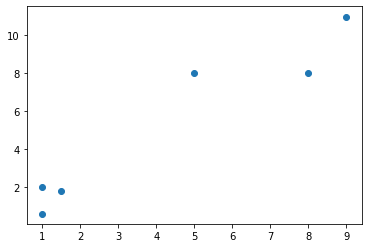

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
k_means.labels_

array([0, 0, 1, 1, 0, 1])

In [7]:
k_means.cluster_centers_

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

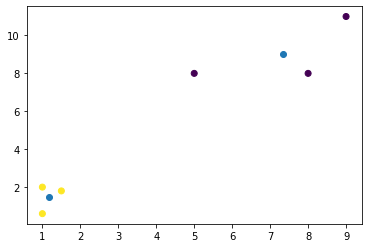

In [10]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

### KMeans ON IRIS DATASETS

In [75]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_iris()

In [76]:
x = data.data

In [77]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
pred = k_means.predict(x)

In [79]:
val = data.target==pred

In [80]:
(val.sum()/len(val))*100

89.33333333333333

### SELF - IMPLEMENTATION OF KMeans

In [10]:
import numpy as np,matplotlib.pyplot as plt
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

In [37]:
 class K_Means:
        def __init__(self, k = 2, max_iter = 100):
            print("constructor")
            self.k = k
            self.max_iter = max_iter
            self.means = []
       
        def fit (self, data):            
            # randomly initialize the means
            for i in range(self.k):
                self.means.append(data[i])
            for i in range(self.max_iter):
                # assign the data points to the cluster that they belong to
                # create empty clusters        
                clusters = []
                for j in range(self.k):
                    clusters.append([])
                for point in data:
                    # find distance to all the mean values
                    distances = [((point - m)**2).sum() for m in self.means]
                    # find the min distance
                    minDistance = min(distances)
                    # find the mean for which we got the minimum distance --> l
                    l = distances.index(minDistance)
                    # add this point to cluster l
                    clusters[l].append(point)
        
                # calculate the new mean values
                change = False
                for j in range(self.k):
                    new_mean = np.average(clusters[j], axis=0)
                    if not np.array_equal(self.means[j], new_mean):
                        change = True
                    self.means[j] = new_mean
                if not change:
                    break
            
        def predict(self, test_data):
            predictions = []
            for point in test_data:
                 # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                # add this point to cluster l
                predictions.append(l)
            return predictions

In [38]:
kmeans = K_Means(2, 100)
kmeans.fit(x)

constructor


In [39]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [40]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]